# World Happiness Report Project
## Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

## What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

## What do the columns succeeding the Happiness Score (like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.

### Dataset Link-
### https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [6]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

No nulls values are present

In [7]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. There is no nulls present.
2. data distribution are looking normal but we can check using visualization.

In [11]:
df_mean = df.groupby(['Region'])[['Happiness Score']].mean()

df_mean.sort_values(by = 'Happiness Score')

,Happiness Score
Region,
Sub-Saharan Africa,4.202800
Southern Asia,4.580857
Southeastern Asia,5.317444
Central and Eastern Europe,5.332931
Middle East and Northern Africa,5.406900
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Western Europe,6.689619
North America,7.273000


##### Here we can see that, australia and new zealand has more happiness score and sub-saharan africa has lowest happiness score. and also mean value of happiness score starts from 4.2 to 7.28. so we can see that above 6 happiness score regions.

In [48]:
df_hapiness_5_5 = df.loc[(df['Happiness Score']) > 6]

df_hapiness_5_5 = df_hapiness_5_5.groupby(['Region'])[['Happiness Score']].count()

df_hapiness_5_5.sort_values(by = 'Happiness Score')

,Happiness Score
Region,
Eastern Asia,1
Australia and New Zealand,2
Central and Eastern Europe,2
North America,2
Southeastern Asia,2
Middle East and Northern Africa,6
Latin America and Caribbean,13
Western Europe,16


#### checking difference between maximum and minimum score on the basis of region and hapiness score.

In [13]:
df_max_min = df.groupby(['Region'])[['Happiness Score']].max()-df.groupby(['Region'])[['Happiness Score']].min()

df_max_min.sort_values(by = 'Happiness Score')

,Happiness Score
Region,
Australia and New Zealand,0.002
North America,0.308
Eastern Asia,1.424
Southern Asia,1.678
Central and Eastern Europe,2.287
Sub-Saharan Africa,2.638
Latin America and Caribbean,2.708
Western Europe,2.730
Southeastern Asia,2.979


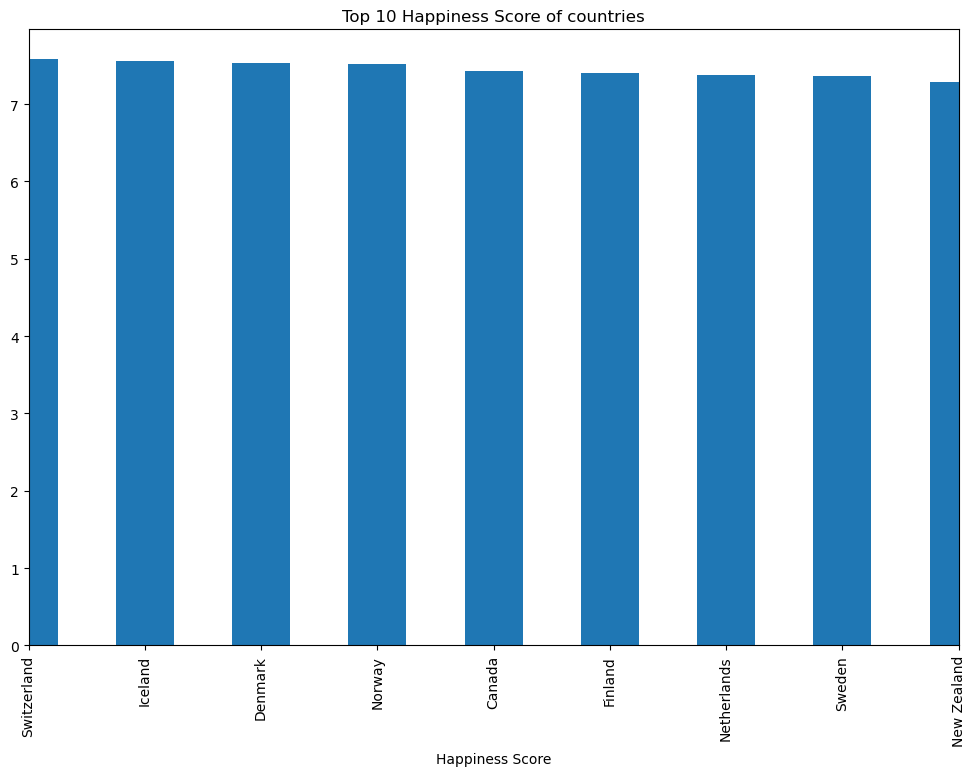

In [14]:
df_plot = df.set_index('Country')
df_plot = df_plot[0:10]['Happiness Score']

fig, ax = plt.subplots(figsize = (12,8))
bar_plot = df_plot.plot.bar()

bar_plot.set_title('Top 10 Happiness Score of countries')
bar_plot.set_xlabel('Happiness Score')

#bar_plot.invert_yaxis()                                               
plt.xlim(0,8)                                                          

plt.show()

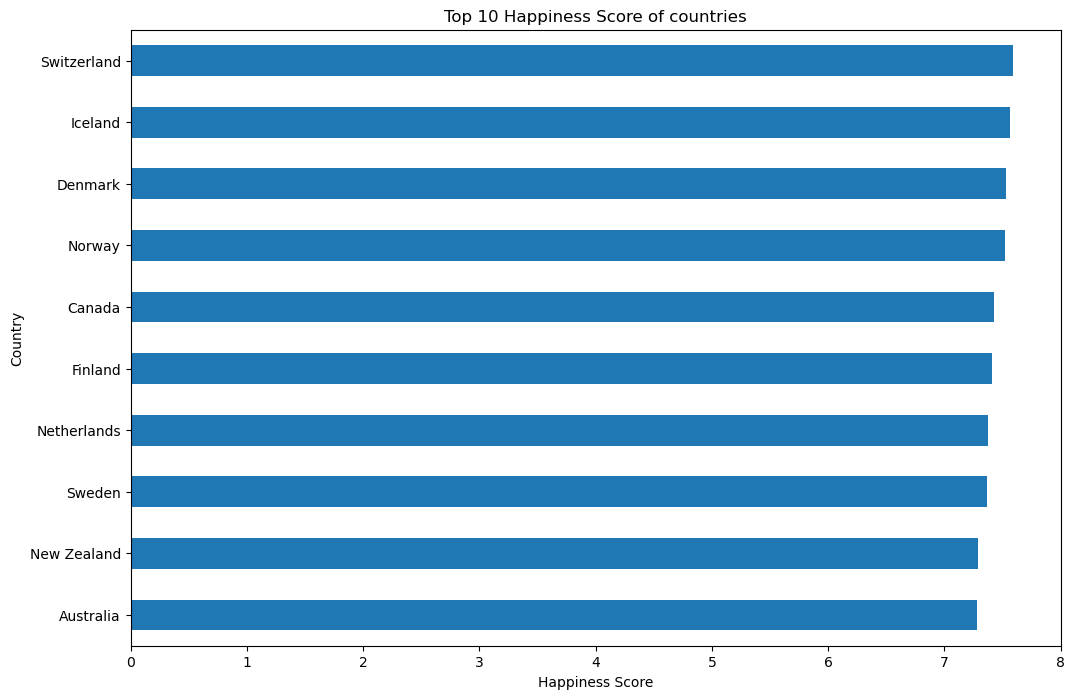

In [15]:
df_plot = df.set_index('Country')
df_plot = df_plot[0:10]['Happiness Score']

fig, ax = plt.subplots(figsize = (12,8))
bar_plot = df_plot.plot.barh()

bar_plot.set_title('Top 10 Happiness Score of countries')
bar_plot.set_xlabel('Happiness Score')

bar_plot.invert_yaxis()                                               
plt.xlim(0,8)                                                          

plt.show()

## Here we can observe top 10 region of happiness score

In [22]:
x_new = df.drop(['Region', 'Country'], axis=1)

In [23]:
x_new

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


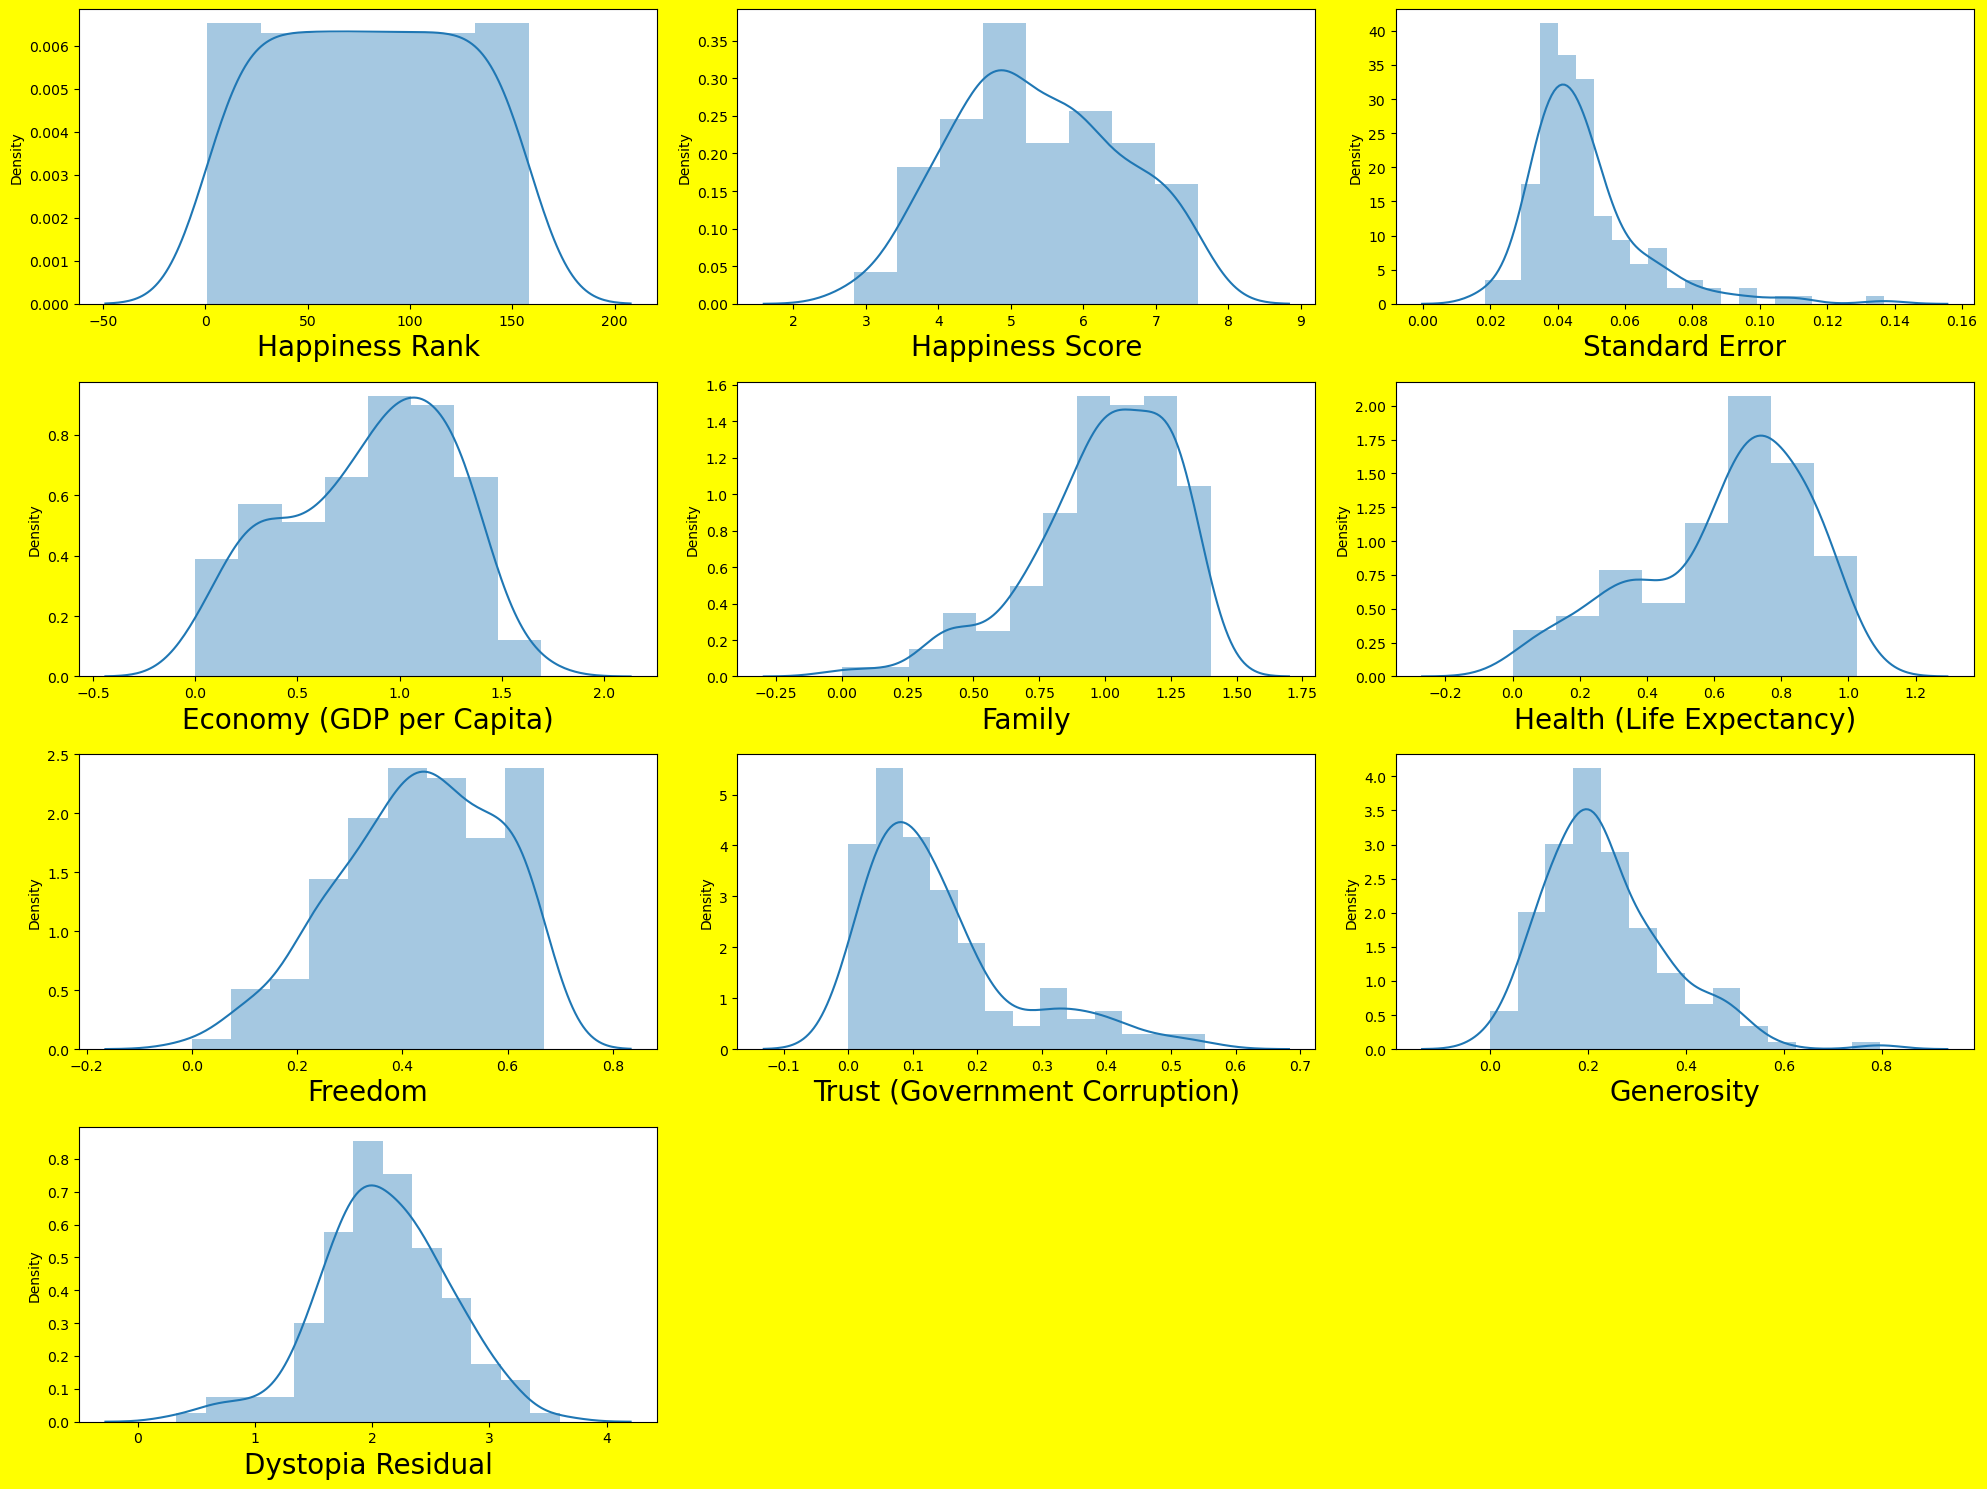

In [24]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in x_new:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

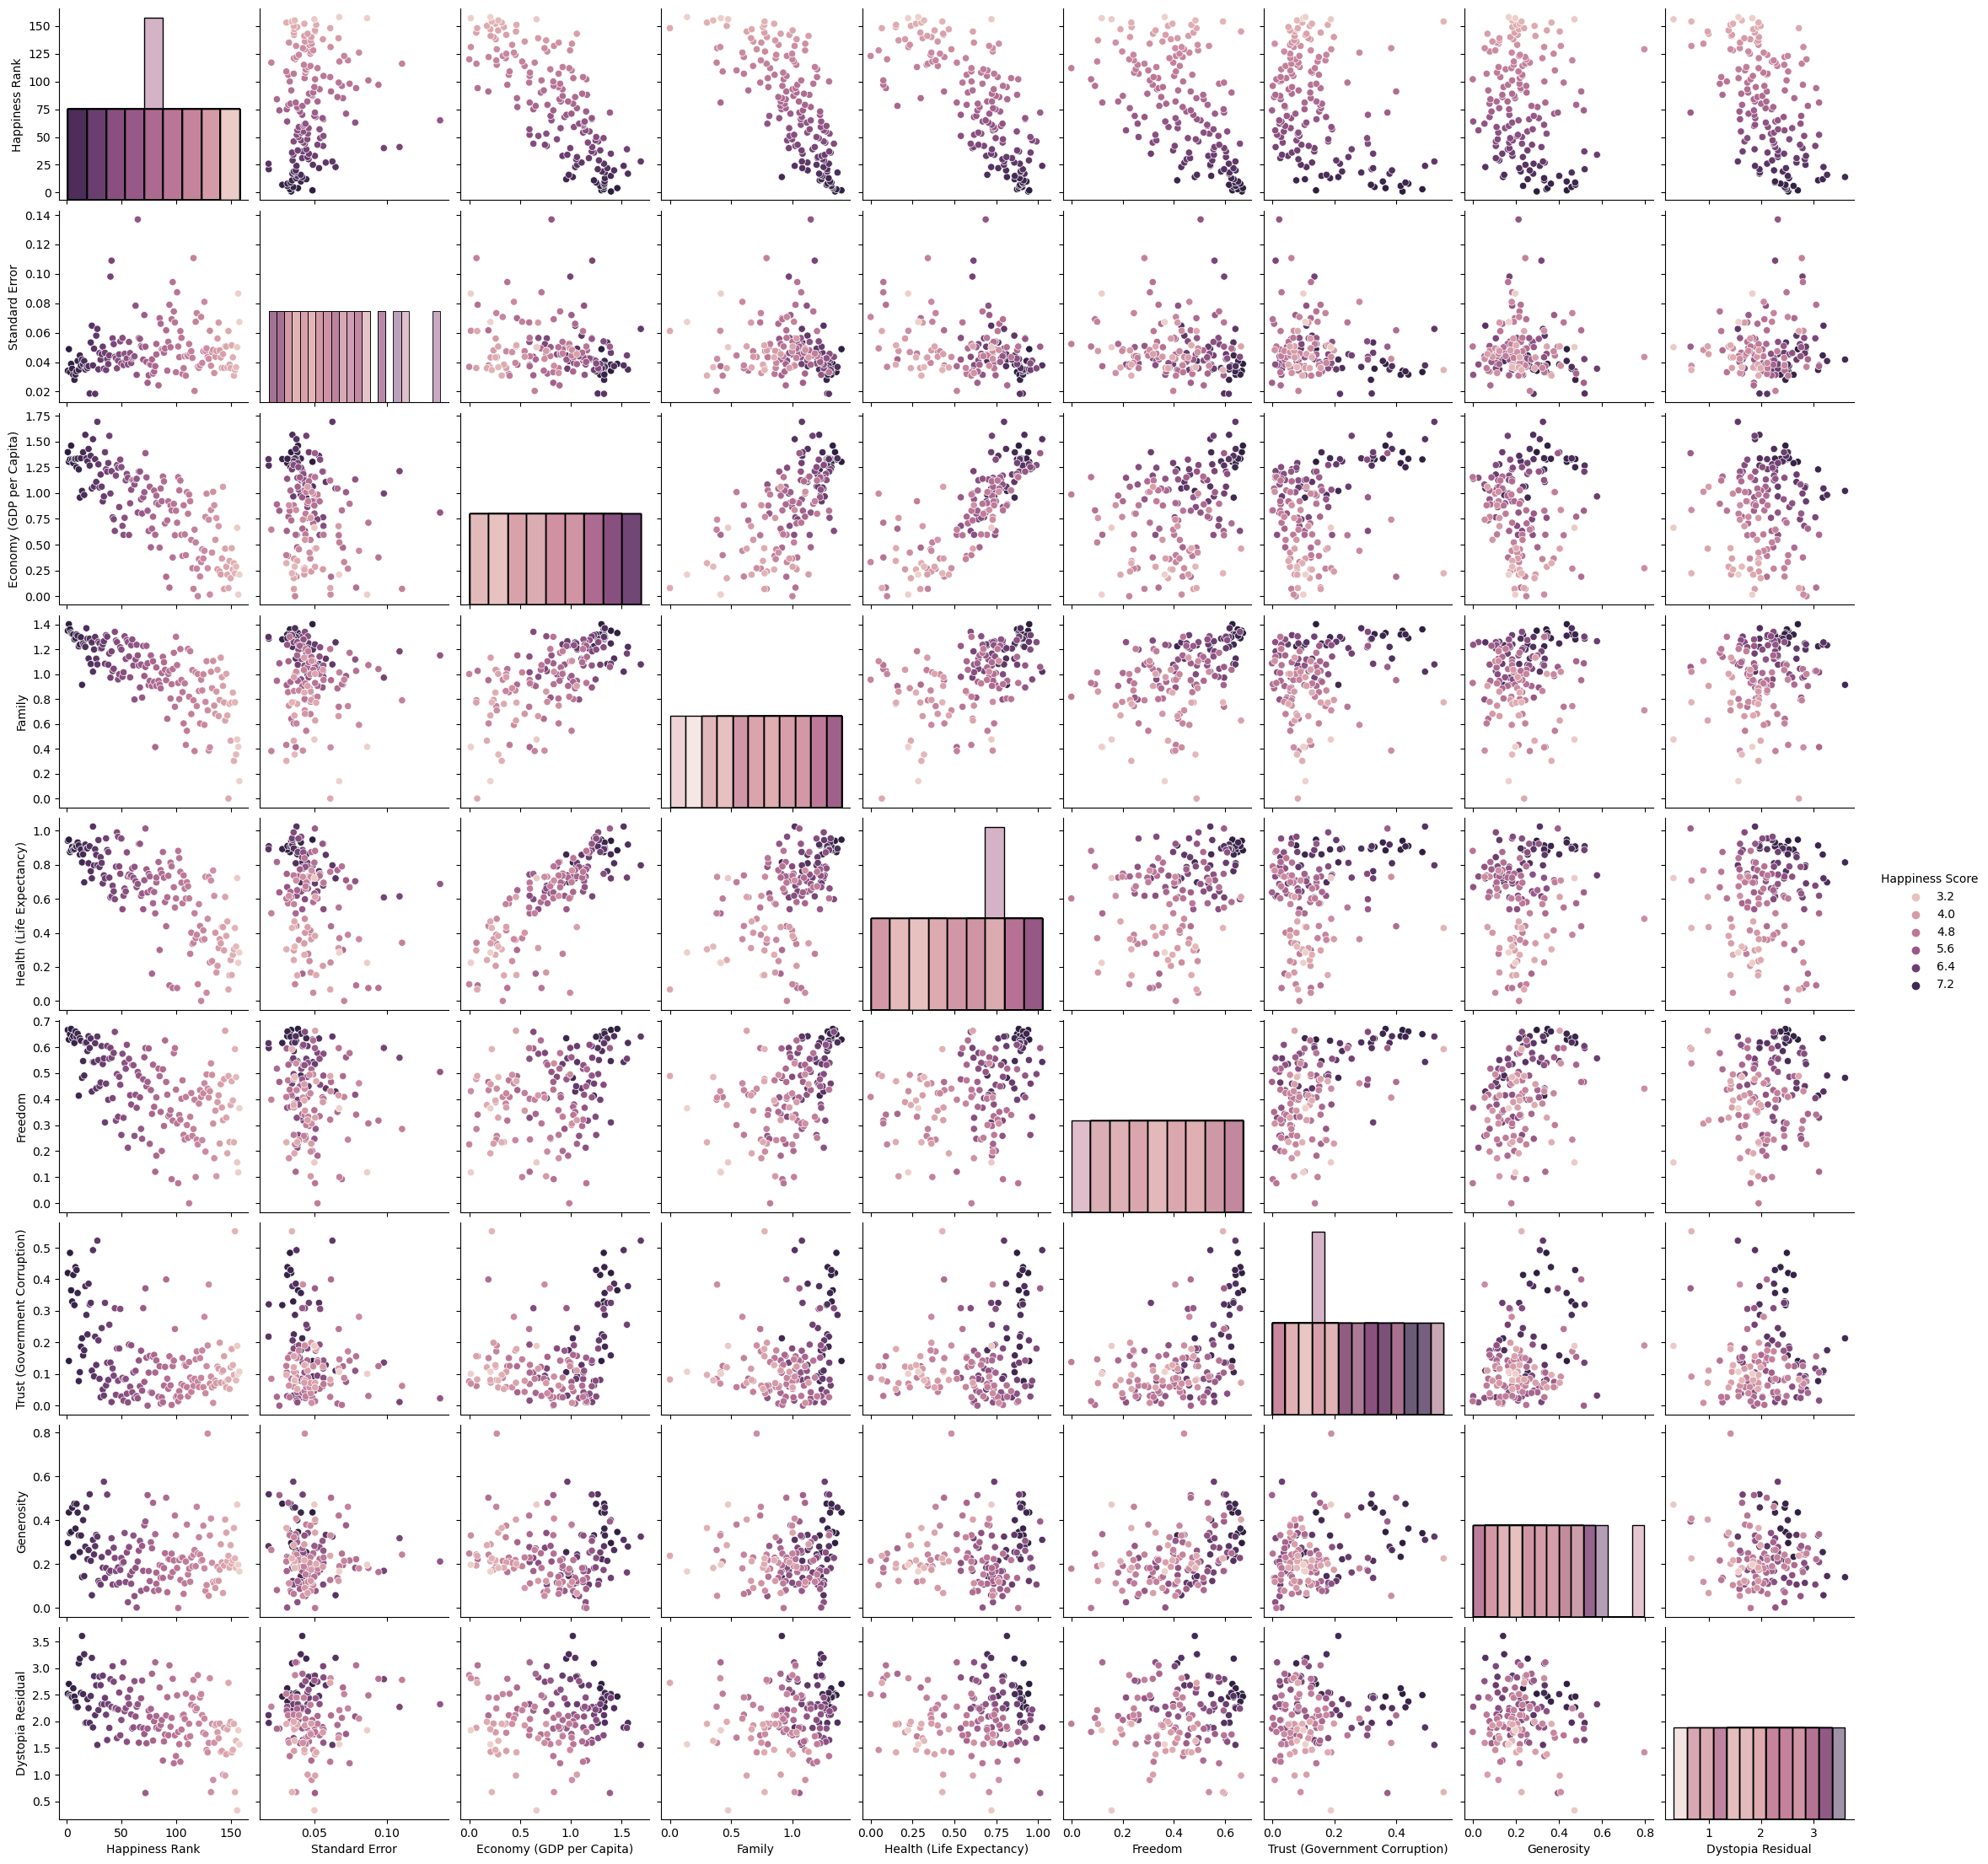

In [28]:
sns.pairplot(df, hue="Happiness Score", diag_kind="hist")

<Axes: ylabel='Count'>

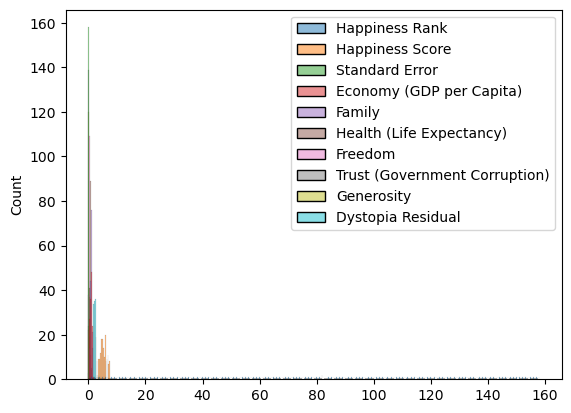

In [35]:
sns.histplot(data=df, )

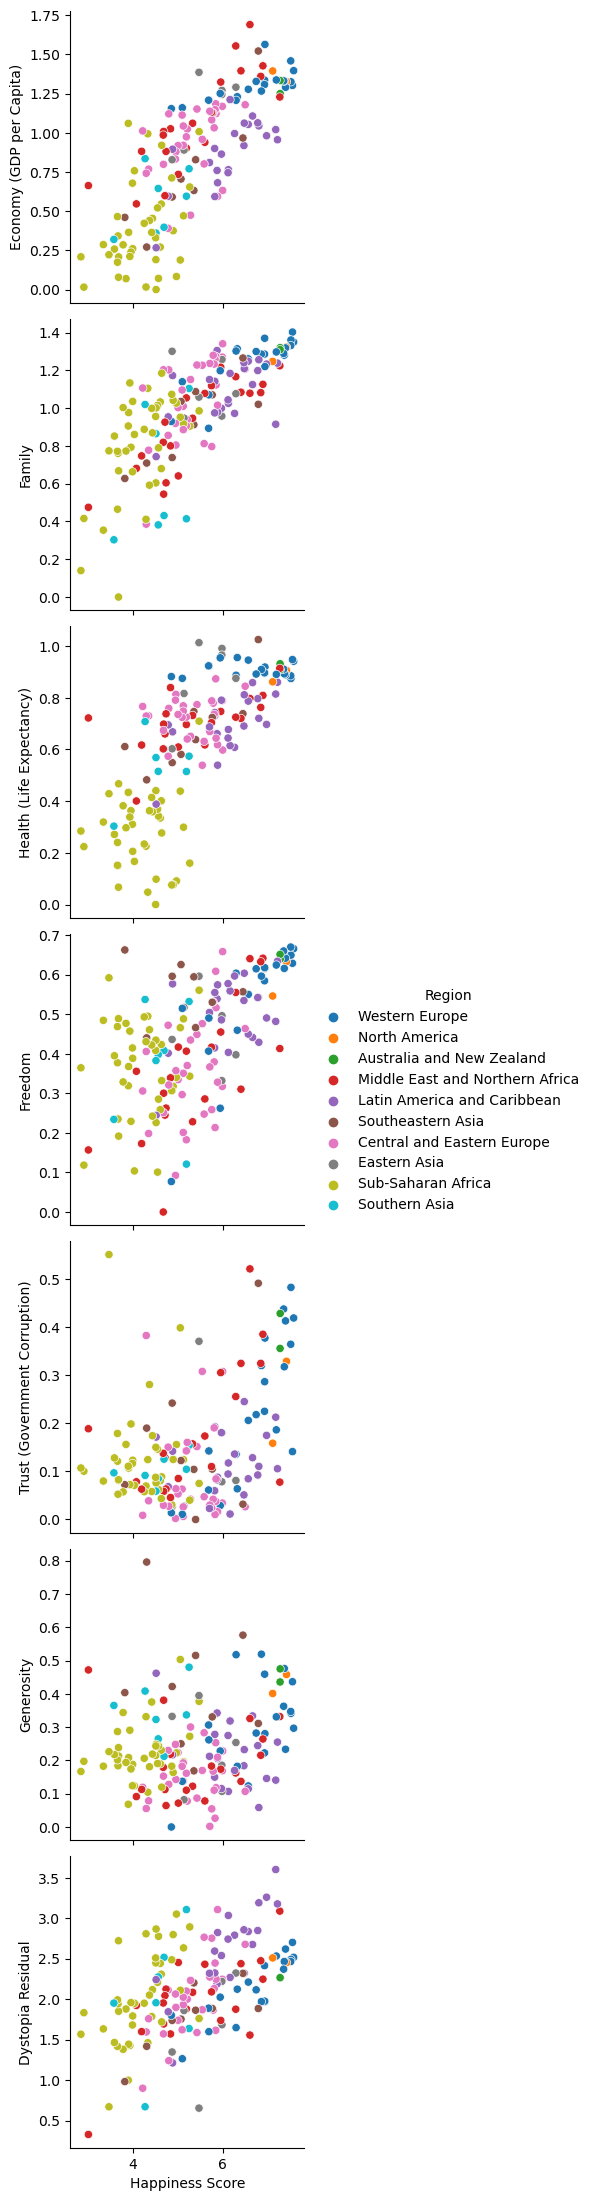

In [39]:
sns.pairplot(df, x_vars = ['Happiness Score'], y_vars =['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'], hue='Region', height=3.2)
plt.show()

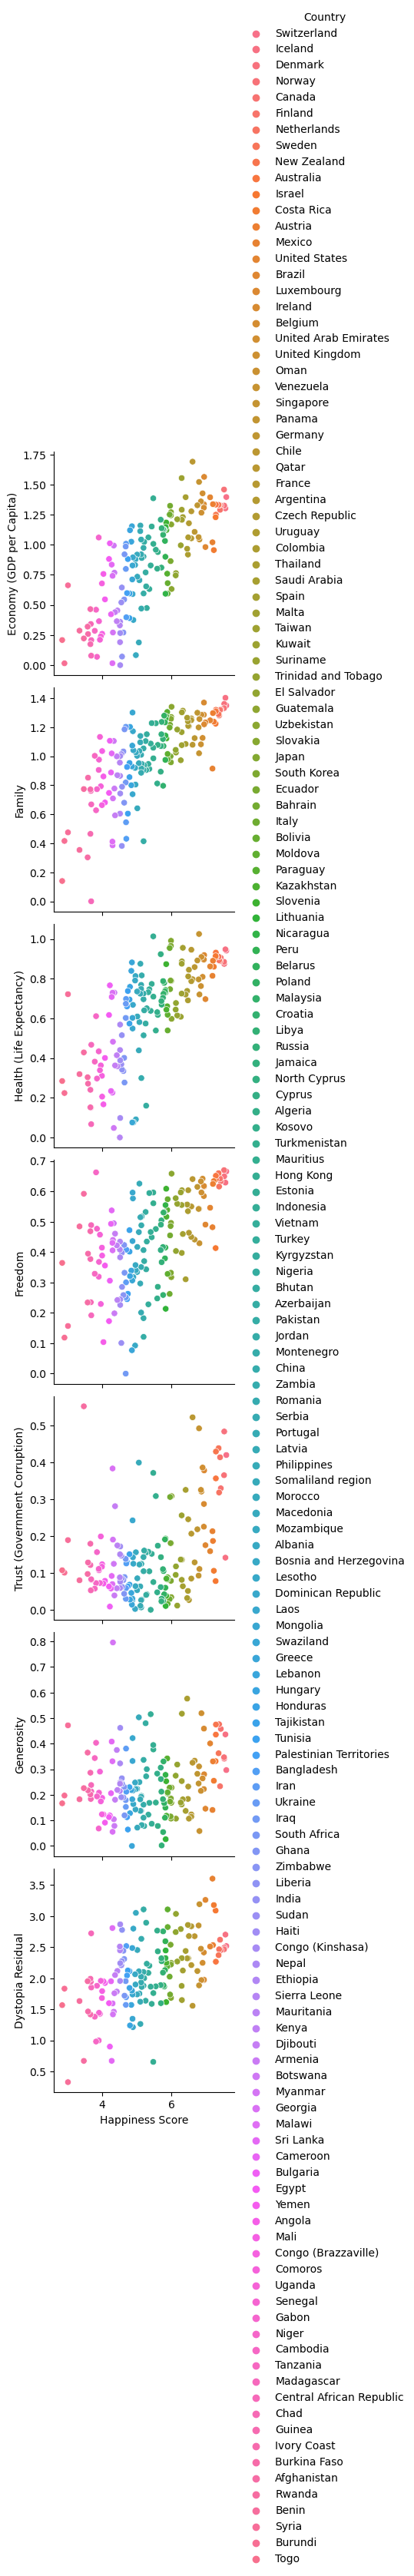

In [40]:
sns.pairplot(df, x_vars = ['Happiness Score'], y_vars =['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'], hue='Country', height=3.2)
plt.show()

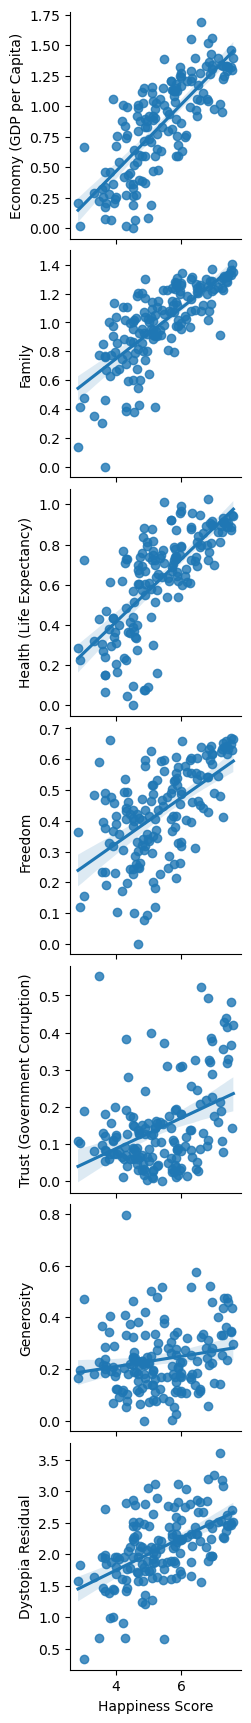

In [42]:
sns.pairplot(df, kind = 'reg',  x_vars = ['Happiness Score'], y_vars =['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'], height=2.5)
plt.show()

### Now we can see that Economy, Health (Life Expectancy) and Family are highest correlation with Happiness score.

In [ ]:
cols_corr=['Happiness_Score','Economy','Family','Health','Freedom',
           'Generosity','Corruption','Dystopia', 'Job Satisfaction']
corr_scores=data_c[cols_corr].corr()['Happiness_Score'][1:]
corr_scores

In [46]:
# correlation with columns


corr_cols = ['Happiness Score', 'Economy (GDP per Capita)','Family',
             'Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
             'Generosity','Dystopia Residual' ]
corr_score = df[corr_cols].corr()['Happiness Score'][1:]
corr_score

Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [47]:
# Here we can observe same correlation with happiness score 

In [50]:
total_score_over_6 = df[(df['Happiness Score'] > 6)].count()

total_score = total_score_over_6['Happiness Score']

total_score

44

In [52]:
print('The probability of country with happiness score over 6 is {:.2f} %'.format(total_score))

The probability of country with happiness score over 6 is 44.00 %


In [54]:
x = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']

In [58]:
x_new_1 = df[['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)',
              'Family', 'Health (Life Expectancy)', 'Freedom', 
              'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
x_new_1

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [61]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_new_1)

In [62]:
x_scaled

array([[-1.72099989, -0.80592569,  1.36962124, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-1.69907456,  0.05588945,  1.13522625, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-1.67714922, -0.8544869 ,  1.19286069, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.67742676,  0.13253425, -0.45524543, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 1.69935209,  2.26396166, -2.06756644, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.72127743,  1.13418227, -1.58633379, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size=0.25, random_state = 355)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [70]:
regression.score(x_train, y_train)

0.9999999365956975

In [71]:
regression.score(x_test, y_test)

0.9999999533878745

In [76]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [81]:
# Creating new datafame country vs region

def region(a,b):
  
    
    c = []
    
    for reg in a:        
        
        if reg == b:
            c.append(1)
        else:
            c.append(0)
    return c 


Western_Europe = region(df['Region'],'Western Europe')
North_America = region(df['Region'],'North America')
Australia_and_New_Zealand = region(df['Region'],'Australia and New Zealand')
Middle_East_and_Northern_Africa = region(df['Region'],'Middle East and Northern Africa')
Latin_America_and_Caribbean = region(df['Region'],'Latin America and Caribbean')
Southeastern_Asia = region(df['Region'],'Southeastern Asia')
Central_and_Eastern_Europe = region(df['Region'],'Central and Eastern Europe')
Eastern_Asia = region(df['Region'],'Eastern Asia')
Sub_Saharan_Africa = region(df['Region'],'Sub-Saharan Africa')
Southern_Asia = region(df['Region'],'Southern Asia')



df_new = df.copy()
df_new = df_new.set_index('Country')    


countries_vs_region = pd.DataFrame(index=df_new.index)      



countries_vs_region['Western Europe'] = Western_Europe
countries_vs_region['North America'] = North_America
countries_vs_region['Australia and New Zealand'] = Australia_and_New_Zealand
countries_vs_region['Middle East and Northern Africa'] = Middle_East_and_Northern_Africa
countries_vs_region['Latin America and Caribbean'] = Latin_America_and_Caribbean
countries_vs_region['Southeastern Asia'] = Southeastern_Asia
countries_vs_region['Central and Eastern Europe'] = Central_and_Eastern_Europe
countries_vs_region['Eastern Asia'] = Eastern_Asia
countries_vs_region['Sub-Saharan Africa'] = Sub_Saharan_Africa
countries_vs_region['Southern Asia'] = Southern_Asia

In [82]:
countries_vs_region

,Western Europe,North America,Australia and New Zealand,Middle East and Northern Africa,Latin America and Caribbean,Southeastern Asia,Central and Eastern Europe,Eastern Asia,Sub-Saharan Africa,Southern Asia
Country,,,,,,,,,,
Switzerland,1,0,0,0,0,0,0,0,0,0
Iceland,1,0,0,0,0,0,0,0,0,0
Denmark,1,0,0,0,0,0,0,0,0,0
Norway,1,0,0,0,0,0,0,0,0,0
Canada,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Rwanda,0,0,0,0,0,0,0,0,1,0
Benin,0,0,0,0,0,0,0,0,1,0
Syria,0,0,0,1,0,0,0,0,0,0


## Western Europe, North America and Australia and New Zealand have more happiness score as compare to all other countries.